Author: Justus Heilingbrunner
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.display import display, Markdown

# ### Scaling
# from sklearn.preprocessing import RobustScaler

# ### HAC
# from sklearn import cluster
# from scipy.cluster.hierarchy import dendrogram, linkage
# # CPCC
# from scipy.cluster.hierarchy import cophenet
# from scipy.spatial.distance import pdist

# ### EM
# from sklearn.mixture import GaussianMixture

# ### PCA
# from sklearn.decomposition import PCA
# from pca import pca

In [2]:
import requests
import dotenv
import re
import pandas as pd
import time

***
***
# The Data



## Hub List all time + pick up and drop offs.csv

In [37]:
df = pd.read_csv('Data/Hub List all time + pick up and drop offs.csv')
df.head()

,id,name,state,created_at,maximum_capacity,pickups,dropoffs
0,30467,Stadtwerke Pop-Up,public,2024-09-12 12:45:29.843902,0,4,1
1,30466,Mobilitätsfest Pop-up,public,2024-09-12 12:07:04.481416,0,15,16
2,30464,Pop Up Rathaus event,public,2024-09-12 07:25:05.597799,20,7,3
3,30434,Felde Gemeindezentrum,public,2024-09-08 09:01:16.289455,18,7,9
4,30420,IPN Pop Up,disabled,2024-09-05 20:53:56.364054,10,0,0


In [38]:
df.head(233)

,id,name,state,created_at,maximum_capacity,pickups,dropoffs
0,30467,Stadtwerke Pop-Up,public,2024-09-12 12:45:29.843902,0,4,1
1,30466,Mobilitätsfest Pop-up,public,2024-09-12 12:07:04.481416,0,15,16
2,30464,Pop Up Rathaus event,public,2024-09-12 07:25:05.597799,20,7,3
3,30434,Felde Gemeindezentrum,public,2024-09-08 09:01:16.289455,18,7,9
4,30420,IPN Pop Up,disabled,2024-09-05 20:53:56.364054,10,0,0
...,...,...,...,...,...,...,...
228,24371,Anleger Reventlou,public,2022-12-19 13:18:10.719836,50,30232,30138
229,24370,Alter Markt,public,2022-12-19 13:18:10.313777,25,15439,15676
230,24369,Alte Mu/Brunswiker Str.,public,2022-12-19 13:18:09.902522,15,7544,7593
231,24368,Umsteiger,public,2022-12-19 13:18:09.467309,20,7633,7629


In [40]:
df['name'].nunique(), df['id'].nunique()

(233, 233)

In [42]:
df['name'].unique()

array(['Stadtwerke Pop-Up', 'Mobilitätsfest Pop-up',
       'Pop Up Rathaus event', 'Felde Gemeindezentrum', 'IPN Pop Up ',
       'SH Netz Cup Pop Up', 'Wankendorf Zob', 'Sporthalle Saxtorfer Weg',
       'Osterby Veranstaltung Pop Up ', 'Hohes Arsenal', 'Jungmannufer',
       'Eiche Dänischenhagen', 'Bushaltestelle Eiderbrücke',
       'Herzog-Friedrich-Straße (ZOB)', 'Rondeel', 'VHS Kurs ',
       'TÖZ Eckernförde ', 'Martinshaus', 'Pop-up Barsbek Korntage',
       'Pop Up VeloCenter ', 'REWE Klausdorf', 'Ostseepark',
       'Stadtwerke / Bürgerhaus Klausdorf', 'Bahnhof Raisdorf',
       'Freibad Raisdorf (saisonal bis 22.09.24)',
       'Rathaus Schwentinental', 'Pop-up Seewiese Bünsdorf',
       'Eiderbad Saison-Station', 'Kiwo Sparkassen Service',
       'B502 Schönkirchener Straße ', 'Langer Rehm P+R',
       'Langer Rehm (Rewe)', 'Wörthstraße', 'KiWo Willestraße ',
       'ab 12 Uhr - KiWo Nordeingang', 'ab 12 Uhr - KiWo Südeingang',
       'KiWo Nordmarksportfeld', 'KiWo Prinz

In [43]:
df['id'].unique()

array([30467, 30466, 30464, 30434, 30420, 30390, 30282, 30207, 30185,
       30156, 30155, 30151, 30147, 30146, 30145, 30126, 30121, 30120,
       30095, 30084, 30027, 30026, 30025, 30024, 30023, 30022, 30011,
       29982, 29974, 29965, 29964, 29963, 29946, 29942, 29941, 29940,
       29939, 29938, 29937, 29936, 29935, 29934, 29933, 29745, 29663,
       29347, 29346, 29345, 29253, 29224, 29200, 29198, 29147, 29112,
       29109, 29083, 29049, 28932, 28814, 28813, 28812, 28811, 28804,
       28803, 28802, 28801, 28800, 28799, 28798, 28797, 28796, 28795,
       28794, 28793, 28792, 28791, 28790, 28789, 28749, 28738, 28264,
       27717, 27567, 27452, 27451, 27450, 27449, 27448, 27447, 27446,
       27445, 27444, 27443, 27442, 27441, 27440, 27382, 27381, 27380,
       27379, 27378, 27377, 27376, 27375, 27374, 27373, 27372, 27209,
       27183, 26889, 26805, 26730, 26725, 26724, 26708, 26653, 26224,
       26209, 24602, 24482, 24481, 24479, 24478, 24477, 24476, 24475,
       24474, 24473,

**Hub List all time + pick up and drop offs.csv | Features:**

1. **id**: 
2. **name**: 
3. **state**: 
4. **created_at**: 
5. **maximum_capacity**: 
6. **pickups**: 
7. **dropoffs**: 

In [7]:
print('number of missing values:', df.isnull().sum().sum())
print('number of NaN values:', df.isna().sum().sum())
df.info()

number of missing values: 0
number of NaN values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                233 non-null    int64 
 1   name              233 non-null    object
 2   state             233 non-null    object
 3   created_at        233 non-null    object
 4   maximum_capacity  233 non-null    int64 
 5   pickups           233 non-null    int64 
 6   dropoffs          233 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 12.9+ KB


In [21]:
# look at dataset
print('Shape:', df.shape)
print('Columns:', df.columns)
print('\ndifferent names:', df['name'].nunique())
print('unique states:', df['state'].nunique())
print(df['state'].unique())
print('\nmaximal capacity:', df['maximum_capacity'].max())
print('minimal capacity:', df['maximum_capacity'].min())
print(df['maximum_capacity'].unique())
print('\n')
print(df['maximum_capacity'].value_counts()[:5])

Shape: (233, 7)
Columns: Index(['id', 'name', 'state', 'created_at', 'maximum_capacity', 'pickups',
       'dropoffs'],
      dtype='object')

different names: 233
unique states: 3
['public' 'disabled' 'fellows']

maximal capacity: 150
minimal capacity: 0
[  0  20  18  10   7  15  16  12  50   6  30  25 150  19  14  40  21  80
  35]


maximum_capacity
15    78
20    58
30    28
0     23
25    20
Name: count, dtype: int64


## 2024 - Hub ID & Drop Off - Pick Up numbers.csv

In [4]:
df_time = pd.read_csv('Data/2024 - Hub ID & Drop Off - Pick Up numbers.csv', sep=';')
df_time.head()

,hub_id,Days in full_date,Average bike_count,# of unique dropoff_hub_id,# of unique pickup_hub_id
0,2180.0,01/01/2024,6.282412,NaN,NaN
1,2180.0,02/01/2024,6.080100,NaN,NaN
2,2180.0,04/01/2024,6.078173,NaN,NaN
3,2180.0,05/01/2024,5.936238,NaN,NaN
4,2180.0,07/01/2024,6.443539,NaN,NaN


**2024 - Hub ID & Drop Off - Pick Up numbers.csv | Features:**

1. **hub_id**: 
2. **days in full_date**: 
3. **Average bike_count**: 
4. **# of unique dropoff_hub_id**: 
5. **# of unique pcikup_hub_id**: 

In [8]:
print('number of missing values:', df_time.isnull().sum().sum())
print('number of NaN values:', df_time.isna().sum().sum())
df_time.info()

number of missing values: 446
number of NaN values: 446
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hub_id                      6930 non-null   float64
 1   Days in full_date           6930 non-null   object 
 2   Average bike_count          6930 non-null   float64
 3   # of unique dropoff_hub_id  6707 non-null   float64
 4   # of unique pickup_hub_id   6707 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.8+ KB


In [6]:
# look at dataset
print('Shape:', df_time.shape)
print('Columns:', df_time.columns)

Shape: (6930, 5)
Columns: Index(['hub_id', 'Days in full_date', 'Average bike_count',
       '# of unique dropoff_hub_id', '# of unique pickup_hub_id'],
      dtype='object')


***

## Grafiken

In [59]:
df_time.head()

,hub_id,Days in full_date,Average bike_count,# of unique dropoff_hub_id,# of unique pickup_hub_id
0,2180.0,01/01/2024,6.282412,NaN,NaN
1,2180.0,02/01/2024,6.080100,NaN,NaN
2,2180.0,04/01/2024,6.078173,NaN,NaN
3,2180.0,05/01/2024,5.936238,NaN,NaN
4,2180.0,07/01/2024,6.443539,NaN,NaN


In [60]:
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hub_id                      6930 non-null   float64
 1   Days in full_date           6930 non-null   object 
 2   Average bike_count          6930 non-null   float64
 3   # of unique dropoff_hub_id  6707 non-null   float64
 4   # of unique pickup_hub_id   6707 non-null   float64
dtypes: float64(4), object(1)
memory usage: 270.8+ KB


In [61]:
df_time['Days in full_date'] = pd.to_datetime(df_time['Days in full_date'], format='%d/%m/%Y')
df_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   hub_id                      6930 non-null   float64       
 1   Days in full_date           6930 non-null   datetime64[ns]
 2   Average bike_count          6930 non-null   float64       
 3   # of unique dropoff_hub_id  6707 non-null   float64       
 4   # of unique pickup_hub_id   6707 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 270.8 KB


In [85]:
# hub_id = 24383 # cau sportstätten
# 24379 # RBZ
# df_filtered = df_time[df_time['hub_id'] == hub_id]

hub_ids = [24383, 24385]
df_filtered = df_time[df_time['hub_id'].isin(hub_ids)]

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


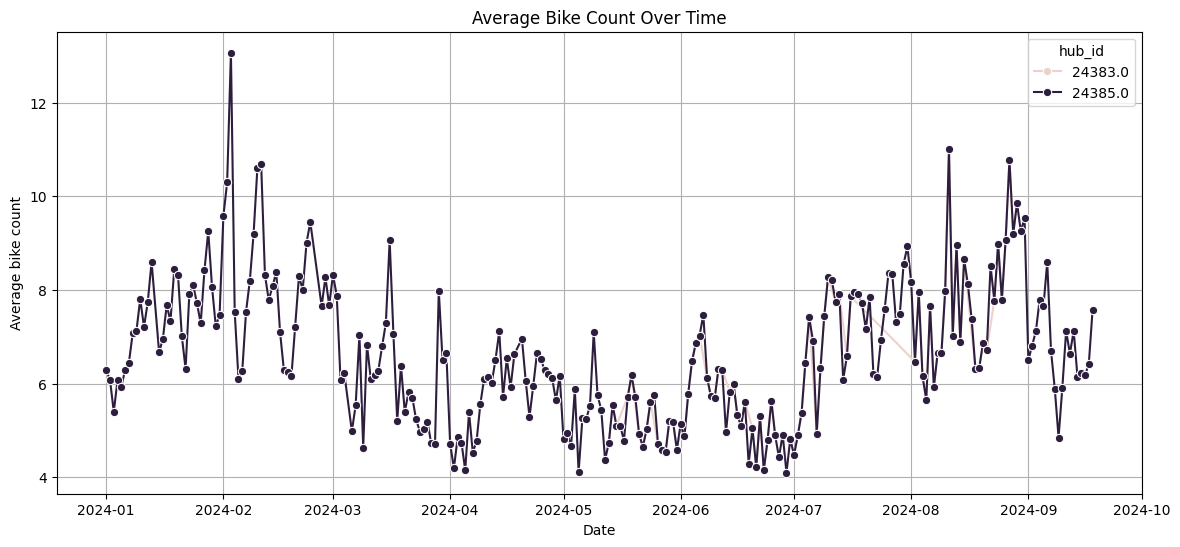

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


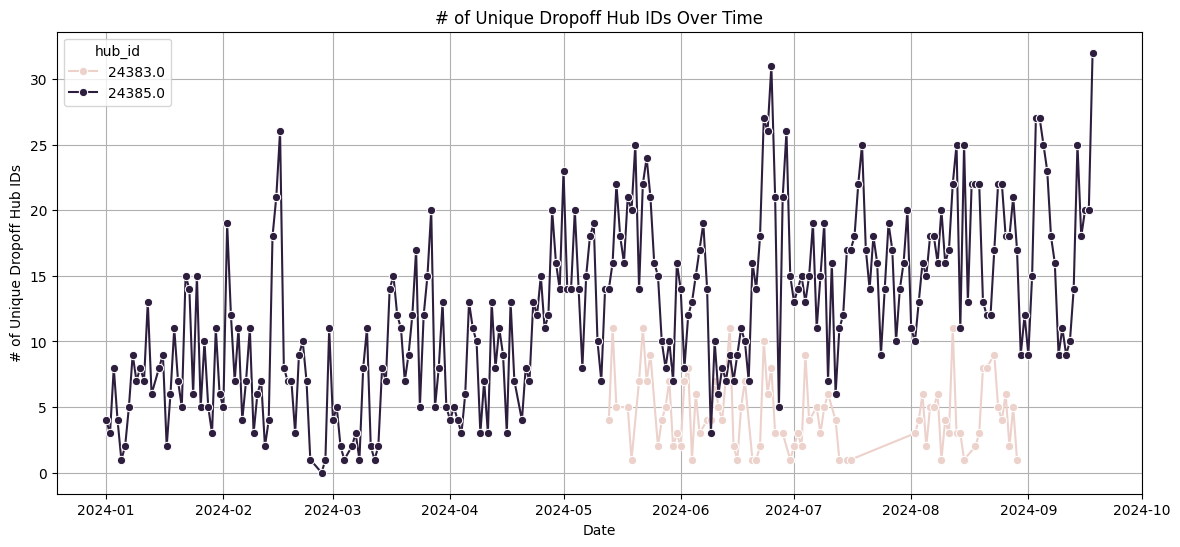

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project\.venv\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


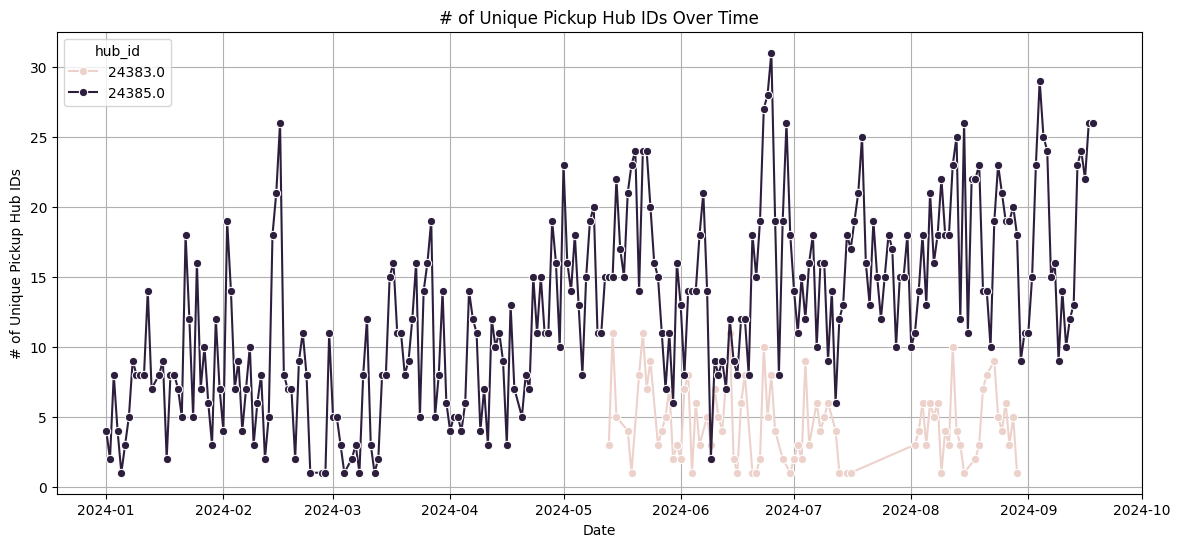

In [86]:
# Definieren Sie die Größe der Figure# Plot für Average bike_count
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='Average bike_count', hue='hub_id', marker='o')
plt.title('Average Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Average bike count')
plt.grid(True)
plt.show()

# Plot für # of unique dropoff_hub_id
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='# of unique dropoff_hub_id', hue='hub_id', marker='o', color="red")
plt.title('# of Unique Dropoff Hub IDs Over Time')
plt.xlabel('Date')
plt.ylabel('# of Unique Dropoff Hub IDs')
plt.grid(True)
plt.show()

# Plot für # of unique pickup_hub_id
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_filtered, x='Days in full_date', y='# of unique pickup_hub_id', hue='hub_id', marker='o', color="blue")
plt.title('# of Unique Pickup Hub IDs Over Time')
plt.xlabel('Date')
plt.ylabel('# of Unique Pickup Hub IDs')
plt.grid(True)
plt.show()

***
***

***
***
# Requests

## .env

In [6]:
# .env
config = dotenv.dotenv_values(".env")

PASSWORD = config["PASSWORD"]

CLIENT_SECRET = config["CLIENT_SECRET"]

In [5]:
token_url = 'https://accounts.kielregion.addix.io/realms/infoportal/protocol/openid-connect/token'
headers = {
    'Content-Type': 'application/x-www-form-urlencoded'
}

data = {
    'grant_type': 'password',
    'username': 'justus.heilingbrunner@student.fh-kiel.de', 
    'password': PASSWORD,
    'client_id': 'quantumleap',
    'client_secret': CLIENT_SECRET
}

response = requests.post(token_url, headers=headers, data=data)

if response.status_code == 200:
    token_data = response.json()
    access_token = token_data['access_token']
    print(f"Bearer Token successful requested")
    if access_token:
        dotenv_path = '.env'
        
        dotenv.set_key(dotenv_path, 'ACCESS_TOKEN', access_token)
        print(f"Access Token erfolgreich in die .env-Datei geschrieben.")
else:
    print(f"Error: {response.status_code}, {response.text}")

Bearer Token successful requested
Access Token erfolgreich in die .env-Datei geschrieben.


In [7]:
config = dotenv.dotenv_values(".env")

ACCESS_TOKEN = config["ACCESS_TOKEN"]

***
## actual Request

In [40]:
url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:30151"

params = {
    'type': 'BikeHireDockingStation',
    'fromDate': '2024-09-13T00:00:00',
    'toDate': '2024-09-13T00:02:05',
    'attrs': 'name,location',
    # 'aggrPeriod': 'hour',
    # 'aggrMethod': 'avg'
}

headers = {
    'NGSILD-Tenant': 'infoportal',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}

response = requests.get(url, headers=headers, params=params)

if response.status_code == 200:
    response_data = response.json()
    print('got a response')
else:
    print(f"Error: {response.status_code}, {response.text}")

got a response


In [41]:
response_data

{'attributes': [{'attrName': 'location',
   'values': [None, {'coordinates': [10.127872, 54.424663], 'type': 'Point'}]},
  {'attrName': 'name', 'values': [None, 'Eiche Daenischenhagen']}],
 'entityId': 'urn:ngsi-ld:BikeHireDockingStation:KielRegion:30151',
 'entityType': 'BikeHireDockingStation',
 'index': ['2024-09-13T00:00:18.150+00:00', '2024-09-13T00:01:15.514+00:00']}

In [19]:
response_data['attributes']

[{'attrName': 'location',
  'values': [None, {'coordinates': [10.122253, 54.341647], 'type': 'Point'}]},
 {'attrName': 'name',
  'values': [None, 'REWE digital am Wissenschaftszentrum']}]

In [20]:
response_data['attributes']['attrName'=='location']['values'][1]['coordinates']

[10.122253, 54.341647]

In [23]:
response_data['attributes']['attrName'=='peter']

{'attrName': 'location',
 'values': [None, {'coordinates': [10.122253, 54.341647], 'type': 'Point'}]}

In [29]:
for attribute in response_data['attributes']:
    if attribute['attrName'] == 'location':
        print(attribute['values'][1]['coordinates'])
    elif attribute['attrName'] == 'name':
        print(attribute['values'][1])

[10.122253, 54.341647]
[None, 'REWE digital am Wissenschaftszentrum']


***

In [14]:
def attributes_to_dataframe_with_index(data, attribute_names):
    # Dictionary to store attribute values
    extracted_data = {}
    
    # Extract entityId and entityType
    entity_id = data.get('entityId', '')
    entity_type = data.get('entityType', '')

    # Extract the number after "KielRegion" from the entityId
    match = re.search(r'KielRegion:(\d+)', entity_id)
    entity_id_number = match.group(1) if match else ''  # Get the number or set to empty if not found

    # Loop through each attribute dictionary in 'attributes'
    for attribute in data.get('attributes', []):
        attr_name = attribute.get('attrName')
        if attr_name in attribute_names:
            extracted_data[attr_name] = attribute.get('values', [])

    # Extract the index from the response
    index_values = data.get('index', [])
    
    # Create a pandas DataFrame from the dictionary
    df = pd.DataFrame(extracted_data)
    
    # Add the index values, entityId number, and entityType as new columns
    df['index'] = index_values
    df['entityId'] = entity_id_number
    df['entityType'] = entity_type
    
    # Reorder the columns to have 'index', 'entityId', and 'entityType' first if desired
    column_order = ['index', 'entityId', 'entityType'] + attribute_names
    df = df[column_order]

    return df


In [15]:

# Example usage
attribute_names = ['availableBikeNumber', 'totalSlotNumber', 'freeSlotNumber']

# Assuming 'data' is your JSON response parsed as a Python dictionary
df = attributes_to_dataframe_with_index(response_data, attribute_names)

# Display the resulting DataFrame
df

,index,entityId,entityType,availableBikeNumber,totalSlotNumber,freeSlotNumber
0,2024-09-13T00:00:17.260+00:00,29200,BikeHireDockingStation,0,NaN,15
1,2024-09-13T00:01:14.623+00:00,29200,BikeHireDockingStation,0,15.0,15
2,2024-09-13T00:02:15.055+00:00,29200,BikeHireDockingStation,0,15.0,15
3,2024-09-13T00:03:14.726+00:00,29200,BikeHireDockingStation,0,15.0,15
4,2024-09-13T00:04:14.723+00:00,29200,BikeHireDockingStation,0,15.0,15
...,...,...,...,...,...,...
1432,2024-09-13T23:55:34.725+00:00,29200,BikeHireDockingStation,0,15.0,15
1433,2024-09-13T23:56:35.605+00:00,29200,BikeHireDockingStation,0,15.0,15
1434,2024-09-13T23:57:34.861+00:00,29200,BikeHireDockingStation,0,15.0,15
1435,2024-09-13T23:58:34.972+00:00,29200,BikeHireDockingStation,0,15.0,15


***

In [43]:
# url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889"
url = "https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:26889"

ids = [
    30467, 30466, 30464, 30434, 30420, 30390, 30282, 30207, 30185,
    30156, 30155, 30151, 30147, 30146, 30145, 30126, 30121, 30120,
    30095, 30084, 30027, 30026, 30025, 30024, 30023, 30022, 30011,
    29982, 29974, 29965, 29964, 29963, 29946, 29942, 29941, 29940,
    29939, 29938, 29937, 29936, 29935, 29934, 29933, 29745, 29663,
    29347, 29346, 29345, 29253, 29224, 29200, 29198, 29147, 29112,
    29109, 29083, 29049, 28932, 28814, 28813, 28812, 28811, 28804,
    28803, 28802, 28801, 28800, 28799, 28798, 28797, 28796, 28795,
    28794, 28793, 28792, 28791, 28790, 28789, 28749, 28738, 28264,
    27717, 27567, 27452, 27451, 27450, 27449, 27448, 27447, 27446,
    27445, 27444, 27443, 27442, 27441, 27440, 27382, 27381, 27380,
    27379, 27378, 27377, 27376, 27375, 27374, 27373, 27372, 27209,
    27183, 26889, 26805, 26730, 26725, 26724, 26708, 26653, 26224,
    26209, 24602, 24482, 24481, 24479, 24478, 24477, 24476, 24475,
    24474, 24473, 24472, 24471, 24470, 24469, 24468, 24467, 24466,
    24465, 24464, 24463, 24462, 24461, 24460, 24459, 24458, 24457,
    24456, 24455, 24454, 24453, 24452, 24451, 24450, 24449, 24448,
    24447, 24446, 24445, 24444, 24443, 24442, 24441, 24440, 24439,
    24438, 24437, 24436, 24435, 24434, 24433, 24432, 24431, 24430,
    24429, 24428, 24427, 24426, 24425, 24424, 24423, 24422, 24421,
    24420, 24419, 24418, 24417, 24416, 24415, 24414, 24413, 24412,
    24411, 24410, 24409, 24408, 24407, 24406, 24405, 24404, 24403,
    24402, 24401, 24400, 24399, 24398, 24397, 24396, 24395, 24394,
    24393, 24392, 24391, 24390, 24389, 24388, 24387, 24386, 24385,
    24384, 24383, 24381, 24380, 24379, 24378, 24377, 24376, 24375,
    24374, 24373, 24372, 24371, 24370, 24369, 24368, 24367
]


params = {
    'type': 'BikeHireDockingStation',
    'fromDate': '2024-09-13T00:00:00',
    'toDate': '2024-09-13T00:02:00',
    'attrs': 'name,location',
    # 'aggrPeriod': 'hour',
    # 'aggrMethod': 'avg'
    }

headers = {
    'NGSILD-Tenant': 'infoportal',
    'Authorization': f'Bearer {ACCESS_TOKEN}'
}


def get_parameter_from_response(response):
    response_data = response.json()

    for attribute in response_data['attributes']:
        if attribute['attrName'] == 'name':
            name = attribute['values'][1]
        elif attribute['attrName'] == 'location':
            location = attribute['values'][1]['coordinates']
        
    return(name, location)


# Über alle IDs iterieren und eine Anfrage für jede ID machen
results = []
for bike_id in ids:
    url = f"https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:{bike_id}"

    try:
        response = requests.get(url, headers=headers, params=params)

        if response.status_code == 200:
            # print(f"Response received for ID {bike_id}")
            name, location = get_parameter_from_response(response)
            results.append({'ID': bike_id, 'Status': 1, 'Name': name, 'Location': location})
        else:
            # print(f"Error: {response.status_code} for ID {bike_id}")
            results.append({'ID': bike_id, 'Status': 0, 'Name': None, 'Location': None})

    except requests.exceptions.RequestException as e:
        # print(f"Request failed for ID {bike_id}")
        results.append({'ID': bike_id, 'Status': 2, 'Name': None, 'Location': None})


df_results = pd.DataFrame(results)
# 0 = response error
# 1 = response received
# 2 = request failed

# Wiederhole den Prozess für alle IDs mit Status 2
while True:
    failed_df = df_results[df_results['Status'] == 2]
    failed_ids = failed_df['ID'].tolist()

    # Breche die Schleife ab, wenn es keine fehlgeschlagenen IDs mehr gibt
    if not failed_ids:
        break

    print(f"Retrying failed requests for IDs: {failed_ids}")

    results = []
    for bike_id in failed_ids:
        url = f"https://apis.kielregion.addix.io/ql/v2/entities/urn:ngsi-ld:BikeHireDockingStation:KielRegion:{bike_id}"

        try:
            response = requests.get(url, headers=headers, params=params)

            if response.status_code == 200:
                # print(f"Response received for ID {bike_id}")
                name, location = get_parameter_from_response(response)
                results.append({'ID': bike_id, 'Status': 1, 'Name': name, 'Location': location})
            else:
                # print(f"Error: {response.status_code} for ID {bike_id}")
                results.append({'ID': bike_id, 'Status': 0, 'Name': None, 'Location': None})

        except requests.exceptions.RequestException as e:
            # print(f"Request failed for ID {bike_id}")
            results.append({'ID': bike_id, 'Status': 2, 'Name': None, 'Location': None})

    new_results = pd.DataFrame(results)

    # Aktualisiere den ursprünglichen DataFrame mit den neuen Ergebnissen
    for index, row in new_results.iterrows():
        df_results.loc[df_results['ID'] == row['ID'], ['Status', 'Name', 'Location']] = row['Status'], row['Name'], row['Location']

# Endgültige Resultate anzeigen
df_results.head()

Retrying failed requests for IDs: [30420, 30185, 30156, 30126, 30095, 30024, 29964, 29963, 29946, 29939, 29933, 29345, 29200, 29147, 28813, 28802, 28801, 28797, 28789, 28749, 28738, 27451, 27450, 27447, 27446, 27440, 27382, 27379, 27376, 27209, 27183, 26725, 26708, 26653, 24481, 24479, 24477, 24474, 24465, 24464, 24463, 24462, 24456, 24454, 24448, 24440, 24435, 24434, 24433, 24426, 24423, 24421, 24418, 24415, 24414, 24410, 24405, 24403, 24401, 24397, 24396, 24394, 24388, 24383, 24379, 24378, 24374, 24371, 24368, 24367]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [44]:
new_results

,ID,Status,Name,Location
0,30420,2,None,None
1,30185,0,None,None
2,30156,0,None,None
3,30126,0,None,None
4,30095,1,Pop up Barsbek Korntage,"[10.319535, 54.40342]"
...,...,...,...,...
65,24378,1,Muthesius Kunsthochschule,"[10.128333, 54.327389]"
66,24374,1,Holsten Hafenstrasse,"[10.135389, 54.321]"
67,24371,1,Anleger Reventlou,"[10.151714, 54.333647]"
68,24368,1,Umsteiger,"[10.131167, 54.314861]"


In [38]:
df_results['Status'].value_counts()

Status
1    204
0     29
Name: count, dtype: int64

In [39]:
df_results.to_csv('Data/response_IDs_KielRegion.csv', index=False)
# 0 = response error
# 1 = response received
# 2 = request failed

***

***
***
# Felix datensatz einlesen

In [30]:
df = pd.read_csv('FelixData_final_main_kiel.csv')
df.head()

,index,entityId,entityType,name,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
0,2024-06-17T11:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.032787,25.000000,30.0,4627,4683
1,2024-06-17T12:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.762712,24.237288,30.0,4627,4683
2,2024-06-17T13:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.864407,24.000000,30.0,4627,4683
3,2024-06-17T14:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.846154,24.153846,30.0,4627,4683
4,2024-06-17T15:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.305556,24.694444,30.0,4627,4683


In [36]:
df['name'].nunique(), df['entityId'].nunique()

(36, 36)

In [34]:
df['name'].unique()

array(['Anleger Dietrichsdorf', 'Umsteiger', 'Alte Mu/Brunswiker Str.',
       'Alter Markt', 'Anleger Reventlou', 'Christian-Albrechts-Platz',
       'Hörnbad', 'Kirchhofallee', 'RBZ Wirtschaft', 'Vinetaplatz',
       'Westring/Eckernförder Str.', 'CAU Sportstätten', 'Dreiecksplatz',
       'Hansastr./Gutenbergstr.', 'Blücherplatz', 'Andreas-Gayk-Straße',
       'Tilsiter Platz', 'Wellingdorf Stadtteilzentrum', 'Hauptbahnhof',
       'Exerzierplatz', 'thyssenkrupp Marine Systems',
       'MEKUN Olympiahochhaus', 'Bernhard-Minetti-Platz',
       'KVG Betriebshof Diedrichstraße', 'Sophienhof', 'ADAC-Station',
       'Förde Sparkasse Lorentzendamm', 'Studiale', 'UKSH', 'Sandkrug',
       'Zur Fähre', 'Seefischmarkt', 'Krausstraße',
       'Kieler Innovations- und Technologiezentrum',
       ' Wik, Kanalfähre - Busstation', 'Wilhelmplatz'], dtype=object)

In [35]:
df['entityId'].unique()

array([24367, 24368, 24369, 24370, 24371, 24373, 24375, 24376, 24379,
       24380, 24381, 24383, 24385, 24389, 24391, 24392, 24393, 24395,
       24397, 24399, 24408, 24412, 24413, 24415, 24417, 24419, 24436,
       24457, 24465, 24466, 24467, 24469, 24471, 24481, 26224, 26889],
      dtype=int64)

***
## geo data test

c:\Users\JustusHeilingbrunner\Documents\UNI\WS_2024_25\Application_Project_2024\.venv\Lib\site-packages\osmnx\features.py:300: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  polygon = gdf_place["geometry"].unary_union


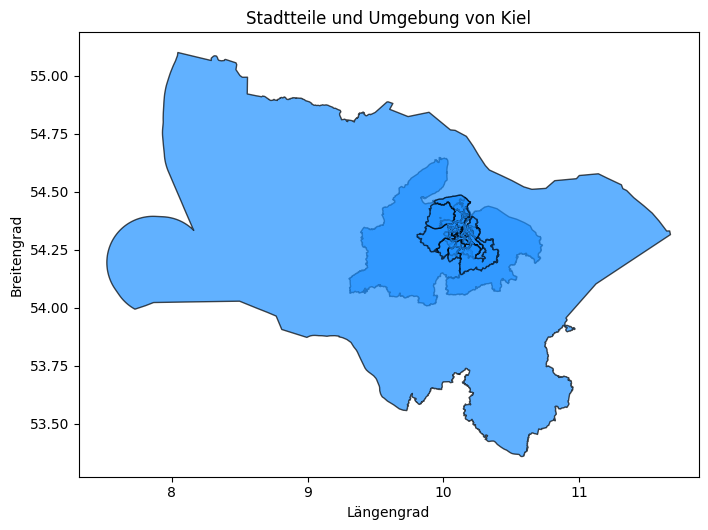

In [ ]:
# Definiere den Ort zur Abfrage ("place")
place_name = "Kiel, Germany"

# Bestimme die tags zum Abrufen von administrativen Grenzen (z.B. Stadtteile)
tags = {'boundary': 'administrative', 'admin_level': ['6','10']}

# Lade die Features basierend auf diesen Tags in dem Gebiet um Kiel
# Ein häufig verwendeter Trick ist, ganz Schleswig-Holstein zu nehmen und es später zu filtern:
boundary_gdf = ox.geocode_to_gdf(place_name)
kiel_and_surroundings = ox.features_from_place(place_name, tags=tags)

# Plotten, um die Sichtbarkeit der Zonierung zu zeigen
fig, ax = plt.subplots(figsize=(8, 8))
boundary_gdf.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=2)
kiel_and_surroundings.plot(ax=ax, color='dodgerblue', edgecolor='black', linewidth=1, alpha=0.7)

# Anpassen und Anzeigen des Plots
plt.title('Stadtteile und Umgebung von Kiel')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()

In [ ]:
tags = {'building': True}
geo_test = ox.features_from_point(
    center_point=(54.322469, 10.132222),
    tags=tags,
    dist=1000)
geo_test = geo_test.reset_index()
# geo_test = geo_test[geo_test.element_type=='relation']
# geo_test = geo_test[['name','geometry']]

In [ ]:
geo_test.head(2)

,element_type,osmid,geometry,opening_hours,access,level,wheelchair,material,amenity,operator,...,bar,frequency,shelter_type,playground,construction,ways,police,type,name:etymology:wikidata,loc_name
0,node,8860572219,POINT (10.12421 54.32084),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,node,8860572222,POINT (10.12405 54.32099),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
